# Homework Assignment 3  
# Regression models

# <p style="text-align: right;"> &#9989; Nick Demski.</p>
# <p style="text-align: right;"> &#9989; Demskini.</p>

# Goal for this homework assignment
By now, you have learned a bit about regression models. In this assignment, you will practice:

* Using branches in Git
* Performing linear regression
* Performing multiple regression
* Performing logistic regression
* Creating a project timeline

**This assignment is due by 11:59 pm on Friday, April 4th.** It should be uploaded into the "Homework Assignments" submission folder for Homework 3.  Submission instructions can be found at the end of the notebook. **There are 80 standard points possible in this assignment including points for Git commits/pushes. The distribution of points can be found in the section headers**.


---
# Part 1: Git Branch (6 points)

For this assignment, you're going to add it to the `cmse202-s25-turnin` repository you created so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s25-turnin` **local** repository and create a new directory called `hw-03`

2. Move this notebook into that **new directory** in your repository, but **do not** add or commit it to your repository yet.

3. Create a **new branch** called `hw03_branch` (The Day 16 PCA and ICA content has information on how to do this).

4. "Check out" the new branch (so that you'll be working on that branch). 

5. Double check to make sure you are actually on that branch.

6. Once you're certain you're working on your new branch, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw03_branch` to push your new branch to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. **Points for this part will be given for correctly setting up branch, etc., above, and for doing git commits/pushes mentioned throughout the assignment.**

git clone https://github.com/Demskini/CMSE202-fs25-turnin/pull/new/hw03_branch

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s25-turnin`" repository inside the `hw-03` directory that you just created within the new branch `hw03-branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.


### Points breakdown -- 1 pt for command to clone repo
###                     2 pts for setting up branch, etc.
###                     3 pts for Git commits/Pushes throughout homework.
git clone https://github.com/Demskini/CMSE202-fs25-turnin/pull/new/hw03_branch

---
# Part 2: Loading the datasets (10 points)

In Parts 2, you will be working with the California Cooperative Oceanic Fisheries Investigations oceanographic and larval fish dataset that is available at https://www.kaggle.com/datasets/sohier/calcofi?resource=download. 

To get started on Part 2, **you'll need to download the following file**:

`https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/Book1.csv`

&#9989; **Question 2.1 (2 points)**: **Do this:** Save the above CSV file in the same directory as your notebook. **Then, in the cell below, put the command line command(s) you used to download the files.** If you did not use a command line tool to download the files, write down the command(s) that *would* have downloaded the files.

``` bash
#after making sure im in the correct directory using cd
curl -O https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/Book1.csv #book1.csv

#I downloaded bottle.csv and cast.csv through the download link and drag and dropped it into my hw-03 folder. but If I were to use terminal, I would either...

curl -O <Url_of_download1>
curl -O <Url_of_download2>

#or use their provided import kaggle code to download it.

```

&#9989;  **Question 2.2 (2 points)**: Next, load the data using Pandas and display the first 20 rows

In [3]:
import pandas as pd

book_df = pd.read_csv('Book1.csv') 
book_df.head(20) #displaying first 20 rows.

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421
5,10.45,33.431
6,10.45,33.440
7,10.24,33.424
8,10.06,33.420
9,9.86,33.494


&#9989;  **Question 2.3 (2 points)**: Do you notice any entries in the datasets are empty or have have `NaN` values. Drop these rows from the dataframes.

In [4]:
NaN_book_df = book_df.dropna()
bookNaN_dropped = len(book_df) - len(NaN_book_df)
print(f"Before dropna: {len(book_df)}")
print(f"After dropna: {len(NaN_book_df)}")
print(f"Total Dropped: {bookNaN_dropped}")

bookNaN_percentdropped = 1 - (len(NaN_book_df) / len(book_df))
print(f"Percent data Dropped: {bookNaN_percentdropped:.4f}")

Before dropna: 864863
After dropna: 814247
Total Dropped: 50616
Percent data Dropped: 0.0585


&#9989;  **Question 2.4 (2 points)**: How many rows did you end up dropping from this data set? What total percentage of data was removed?
- Dropped 50,616 rows from Book1
- Percent dropped was 5.85%

&#9989;  **Question 2.5 (2 points)**: Look at the website in which this dataset is hosted on Kaggle. What do the columns `Salnty` and `T_degC` represent?

<font size=6 color="#009600">&#9998;</font> 
- Salnty = Salinity in g of salt per kg of water (g/kg).
- T_degC = Water temperature in degree Celsius. 

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 2 complete", and push the changes to GitHub.

---

---
# Part 3: One Variable Linear and Polynomial Regression (28 points)

In this part, we'll perform some one-variable linear and polynomial regression analysis on the California Cooperative Oceanic Fisheries Investigations oceanographic and larval fish data.

&#9989;  **Question 3.1 (6 points)**: Using the `OLS` method in `statsmodels`, perform a linear regression to predict the `Salnty` using the `T_degC` and **display the results summaries**. Remember that you may need to use the `add_constant()` method to make sure `OLS` fits a general line $y = ax+b$ to the data instead of a line through the origin $y = ax$. 

In [5]:
import statsmodels.api as sm

x = sm.add_constant(NaN_book_df['T_degC'])#assigning x to be t_degC
y = NaN_book_df['Salnty'] #assigning y to be Salnty

model = sm.OLS(y, x).fit() #set variable name for sm.OLS fit model
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Salnty   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                 2.791e+05
Date:                Fri, 04 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:34:26   Log-Likelihood:            -4.0596e+05
No. Observations:              814247   AIC:                         8.119e+05
Df Residuals:                  814245   BIC:                         8.120e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.4409      0.001   2.83e+04      0.0

&#9989;  **Question 3.2 (4 points)**: Answer the following questions: 

1. What is the R-squared value you got?  

2. Based on your R-squared value, what does it tell you about the regression fit, and how the model fits the data?  

<font size=+3>&#9998;</font> Put your answers here:

1-R^2 = 0.25
2-it means 25% of the variation of the dependent variable can be explain by the independent variable, meaning that this is a WEAK correlation.

&#9989;  **Question 3.3 (6 points)**: Now make a scatter plot of `T_degC` (x-axis) vs. `Salnty` (on y-axis). Plot the best fit line on the same plot. Label the axes, and add a legend, and give the plot a title.

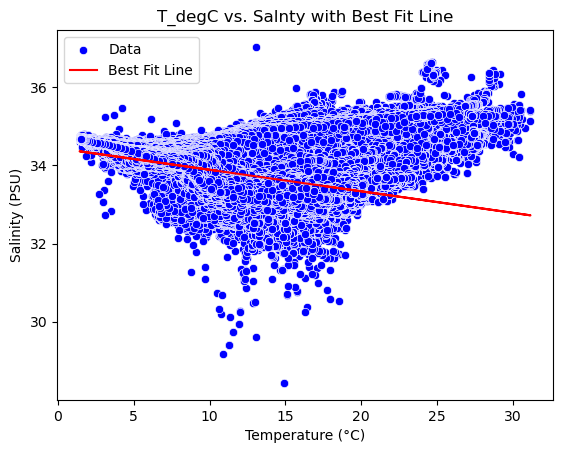

Slope: -0.05520775200529128
Intercept: 34.44090911004


/tmp/ipykernel_934038/3928946259.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]
/tmp/ipykernel_934038/3928946259.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=NaN_book_df['T_degC'], y=NaN_book_df['Salnty'], label="Data", color="blue")
predictions = model.predict(x) #variable name for predictions
#line of best fit on plot 
plt.plot(NaN_book_df['T_degC'], predictions, label="Best Fit Line", color="red")


plt.xlabel('Temperature (°C)')
plt.ylabel('Salinity (PSU)')
plt.title('T_degC vs. Salnty with Best Fit Line')
plt.legend()
plt.show()

# Code to Find Slope and Intercept of fit line (asked chatgpt on 4/4 "How would I access the slope and intercept in a OLS regression model fitted using statsmodels?"
# Get the coefficients (intercept and slope)
slope = model.params[1] 
intercept = model.params[0]
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


&#9989;  **Question 3.4 (2 points)**: What is the slope and intercept of your fit line?

Slope = -0.05521
Intercept = 34.441

**&#9989; Do this:** **Question 3.5 (4 points)**: Use `plot_regress_exog` to investigate the distribution of residuals in your model fit. Make sure to create a large enough figure so that everything is easily visible. 

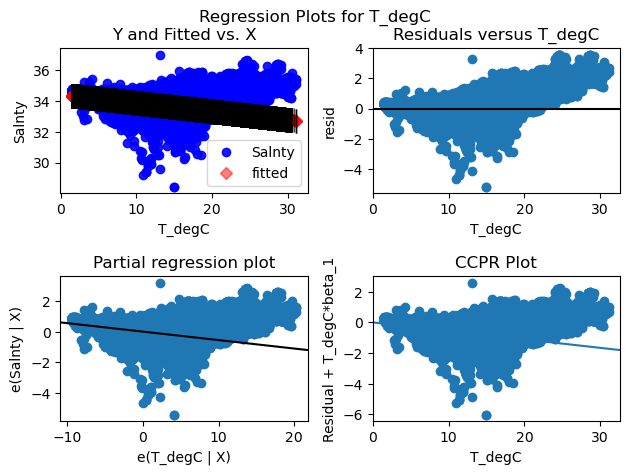

In [11]:
import statsmodels.graphics.regressionplots as sm_plots

sm_plots.plot_regress_exog(model, 'T_degC', fig=None)
plt.show()

&#9989;  **Question 3.6 (6 points)**: Now use some online resource to help you make sense of this residual plot. Is there heteroscedastisity? Is there constant variance? Does it show signs of non-linearity? These are a few questions you might ask yourself or try to figure out in making sense of the residual plot. 

<font size=+3>&#9998;</font> -There is heteroscedastisity, the variance is not constant across the graph.
-there is not constant varianc, some points the graph variance goes down with many outliers, where at other parts the variance is skinner and above the line of best fit. 
-there is nonlinearity, the data is shapped like a banana, is not a line.

Answer: It looks biased and heteroscedastic. aka it is not what we want to see in a residual plot for a model.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 3 complete", and push the changes to GitHub.

---

# Part 4: Multiple Regression (24 points)

In this part, we'll use multiple features to do predictions. https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data

First, download and read in this synthetic dataset of Student Performance. `https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/Student_Performance.csv`

&#9989;  **Question 4.1 (5 points)**: Display the data types of the data you have just read in. We want all of our data types to be integers or floats. Modify the `Extracurricular Activities` column so that a YES is now a 1 and a NO is now a 0. 

In [28]:
sp_df = pd.read_csv("Student_Performance.csv")
# Clean the 'Extracurricular Activities' column: strip whitespace and standardize case {FROM CHAT GPT}
sp_df['Extracurricular Activities'] = sp_df['Extracurricular Activities'].str.strip().str.upper() # Used Chat gpt to create this line right here (4/4 asked chat gpt "Here is my current code... How do I make it so I don't get NaN values and instead get the 1's and 0's like I sought after.
sp_df['Extracurricular Activities'] = sp_df['Extracurricular Activities'].map({'YES': 1, 'NO': 0})
sp_df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


&#9989;  **Question 4.2 (5 points)**: Using the `OLS` method in `statsmodels`, perform a multivariable linear regression to predict the `Performance Index` based on `Hours Studied`, `Previous Scores`,`Extracurricular Activities`, `Sample Question Papers Practiced` and `Sleep Hours`. Also, use the `add_constant()` method in `statsmodels` to ensure the model includes a constant term as well. Fit these models and display the summary of results.  For now only use three columns of data as independent variables.You can. choose which columns to use in your model. We will add all of the other columns later.

In [31]:
x = sp_df[['Hours Studied', 'Previous Scores', 'Sleep Hours']]
x = sm.add_constant(x) #used code from above and literally just changed it to fit this dataframe.
y = sp_df['Performance Index']

model = sm.OLS(y, x).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.665e+05
Date:                Fri, 04 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:13:37   Log-Likelihood:                -21774.
No. Observations:               10000   AIC:                         4.356e+04
Df Residuals:                    9996   BIC:                         4.359e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -32.9146      0.127   -2

&#9989;  **Question 4.3 (4 points)**: Answer the following questions: 

1. What is your R-squared value? 

2. Is your multiple regression model a good fit? why or why not?

<font size=+3>&#9998;</font> 1- R^2 = 0.988
2- this is a VERY good fit. 98.8% of dependent variable variation is explainined by the independed variable.

&#9989;  **Question 4.4 (2 points)**: Perform the multivariable linear regression again, but this time with all the features/columns. Display the summary of these results.

In [34]:
x = sp_df.drop(columns=['Performance Index']) #code is above, just re assigning x and y
x = sm.add_constant(x)

y = sp_df['Performance Index'] 
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Fri, 04 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:18:42   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

&#9989;  **Question 4.5 (2 points)**: How much better/worse is the full model compared to the original model you made? What are its advantages? Briefly discuss the answer.

<font size=+3>&#9998;</font> The models are extremely close to one another in r^2 values, the newer model (full model) has a fit that is 0.01% higher than the model with 3 predictors. its advantages are using more data to fit and predict to than just the 3 catagories.

&#9989;  **Question 4.6 (3 points)**: Create five `.graphics.plot_regress_exog` figures, one for each of the features (columns of original dataframe) in your model. Pay attention to the top two plots: the fitted values figure and the residual plot. 

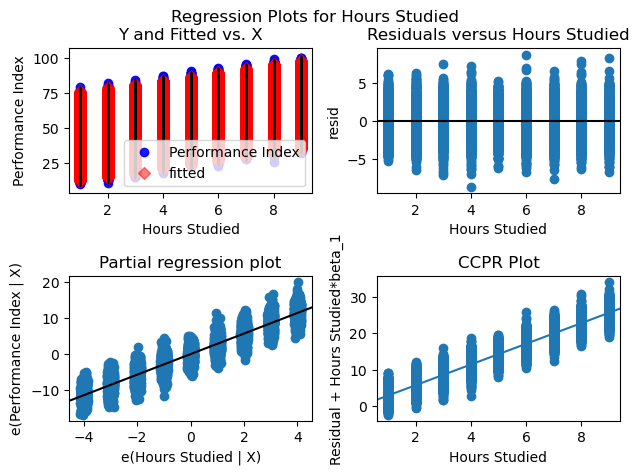

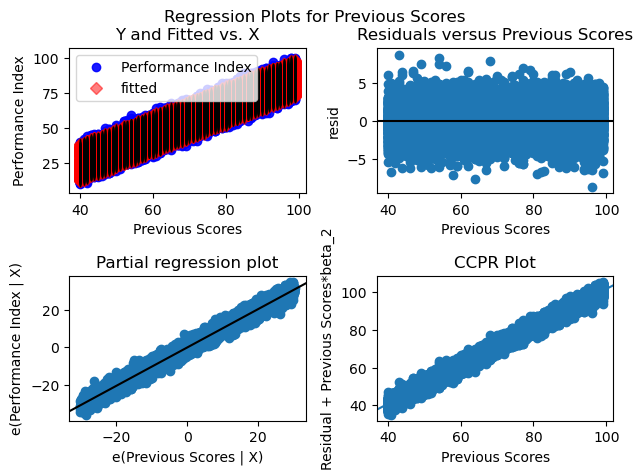

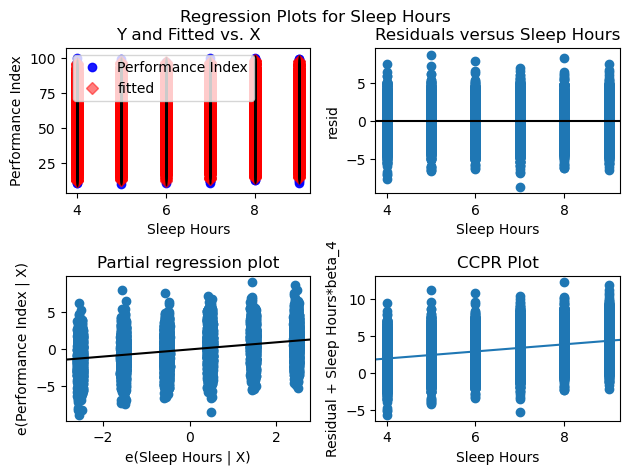

In [37]:
import statsmodels.graphics.api as smg
for feature in X.columns[1:]: #looping through the colum names
    smg.plot_regress_exog(model, feature)

&#9989;  **Question 4.7 (3 points)**: If we could only use one feature to predict Student Performance, which feature would do the best job? 

Hours studied look the best, each does a good job of influencing good predictions but hours studied shows the least variance as well as fitting the data most (according to my eyesight)

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 4 complete", and push the changes to GitHub.

---

# Part 5: Logistic Regression (17 points)

In this part, we'd like to use logistic regression to classify whether a candy has chocolate or not. Logistic regression (as we've learned so far in class) does binary classification. 



&#9989;  **Question 5.1 (2 points)**: We will work with data that is available at https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking/data 

**You'll need to download the following file**:

`https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/candy-data.csv`

**Do This**: In the cell below, type the code for downloading the data from inside your notebook and also code for loading the data into a pandas dataframe.

In [41]:
candy_df = pd.read_csv("candy-data.csv")
candy_df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


&#9989;  **Question 5.2 (3 points)**:

Create a `Pandas` `Series` called `labels` which has data from the `Chocolate` column of the DataFrame. Also, create a `Pandas` `DataFrame` called `features` which consists of all the columns besides `competitorname` and `chocolate`. Display the labels and features to make sure you did this correctly.

In [42]:
labels = candy_df['chocolate']
print(labels.head())
features = candy_df.drop(columns=['competitorname', 'chocolate'])
print(features.head())



0    1
1    1
2    0
3    0
4    0
Name: chocolate, dtype: int64
   fruity  caramel  peanutyalmondy  nougat  crispedricewafer  hard  bar  \
0       0        1               0       0                 1     0    1   
1       0        0               0       1                 0     0    1   
2       0        0               0       0                 0     0    0   
3       0        0               0       0                 0     0    0   
4       1        0               0       0                 0     0    0   

   pluribus  sugarpercent  pricepercent  winpercent  
0         0         0.732         0.860   66.971725  
1         0         0.604         0.511   67.602936  
2         0         0.011         0.116   32.261086  
3         0         0.011         0.511   46.116505  
4         0         0.906         0.511   52.341465  


&#9989;  **Question 5.3 (4 points)**: Split your data into a training and testing set with a training set representing 80% of your data. For reproducibility, set the `random_state` argument to `0`. Print the shapes of the training features, the testing features, the training labels, and the testing labels to show you have the right number of entries in each of the four variables.

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

# Print the shapes of the training and testing sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(68, 11)
(17, 11)
(68,)
(17,)


&#9989;  **Question 5.3 (4 points)**: Now, train a logistic regression model using your training features and training labels. **Display the summary**.

In [52]:
import statsmodels.api as sm
x_train_with_const = sm.add_constant(x_train)

#training the model
logit_model = sm.Logit(y_train, x_train_with_const)
result = logit_model.fit()
#summary you asked for.
print(result.summary())


         Current function value: 0.160059
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              chocolate   No. Observations:                   68
Model:                          Logit   Df Residuals:                       56
Method:                           MLE   Df Model:                           11
Date:                Fri, 04 Apr 2025   Pseudo R-squ.:                  0.7689
Time:                        17:42:34   Log-Likelihood:                -10.884
converged:                      False   LL-Null:                       -47.105
Covariance Type:            nonrobust   LLR p-value:                 4.186e-11
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -10.7656      5.411     -1.989      0.047     -21.372      -0.159
fruity              -6.8280      2.455     -2.7

/opt/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


&#9989;  **Question 5.4 (4 points)**: Finally, test your logistic regression model using your testing features and testing labels. Display the fraction of testing data points that were correctly predicted. 

In [54]:
#getting predictions for y
y_pred = logreg_model.predict(x_test)

#getting the amount of predictions that matched the actual score in a sum
correct_predictions = (y_pred == y_test).sum()

#getting total predictions (to match the test set)
total_predictions = len(y_test)

#accuracy (fraction to solve for percentage)
accuracy = correct_predictions / total_predictions

print(accuracy)


0.9411764705882353


---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 5 complete", and push the changes to GitHub.

---

## Part 6. Setting a project timeline. (5 points)

You will know which project you will be working on as a group on Monday/Tuesday March 24th/25th. You and your group will be presenting this project during the last week of class (April 21st - 25th).  Come up with a project timeline with specific goals/checkpoints to meet as this deadline approaches.  The ability to set project timelines is a very useful skill to have professionally. You can create this timeline yourself, as a group, or you may ask generative ai to try and make a timeline for you. Try to in the very least create weekly checkpoints (~3).

Put your timeline here

## Part 1. Continued

Now that you've finished your new "development" on your 202 turn-in repo, you can merge your work back into your `main` branch.

**&#9989; Do the following**:

7. Switch back to your `main` branch. 
8. Merge your `hw03_branch` with your `main` branch. 
9. Finally, push the changes to GitHub.

---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [4]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

Submit this assignment by uploading it to the course D2L web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework 3, and upload it there.

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University